In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [182]:
!kaggle datasets download -d bytadit/ecommerce-order-dataset -p /content/ --unzip

Dataset URL: https://www.kaggle.com/datasets/bytadit/ecommerce-order-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/14.5M [00:00<?, ?B/s]
100% 14.5M/14.5M [00:00<00:00, 164MB/s]


In [183]:
customers = pd.read_csv('/content/Ecommerce Order Dataset/train/df_Customers.csv')
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP


In [184]:
orderItems = pd.read_csv('/content/Ecommerce Order Dataset/train/df_OrderItems.csv')
orderItems.head()

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66


In [185]:
orders = pd.read_csv('/content/Ecommerce Order Dataset/train/df_Orders.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18


In [186]:
payments = pd.read_csv('/content/Ecommerce Order Dataset/train/df_Payments.csv')
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15


In [187]:
products = pd.read_csv('/content/Ecommerce Order Dataset/train/df_Products.csv')
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0


##Data exploration and Cleaning

In [188]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [189]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


In [190]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


###orders

In [191]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,9
order_delivered_timestamp,1889
order_estimated_delivery_date,0


In [192]:
orders['order_status'].value_counts()

,count
order_status,
delivered,87428
shipped,936
canceled,409
processing,273
invoiced,266
unavailable,2
approved,2


In [193]:
orders[orders['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
10788,4Itts2TBUQzs,Z3dI7uRBfJOD,delivered,2017-02-17 13:05:55,NaN,2017-03-02 11:09:19,2017-03-20
16137,6MPB830Ufh0n,SOtqXN1MqcLj,delivered,2017-02-17 17:21:55,NaN,2017-03-03 12:16:03,2017-03-20
28951,lqW95yj4n1Qd,jCPmhkcyVR1z,delivered,2017-02-18 15:52:27,NaN,2017-03-07 13:57:47,2017-03-29
30494,dn1i9D4DFVZ2,Es95IGZCDDXy,delivered,2017-02-17 15:53:27,NaN,2017-03-03 11:47:47,2017-03-23
41752,vBZCEuCG9Hf1,zHEH7vdeO6UZ,delivered,2017-02-18 11:04:19,NaN,2017-03-02 16:15:23,2017-03-22
42772,PXwPIjmXCehX,gjKhFw8AFnW1,delivered,2017-02-18 16:48:35,NaN,2017-03-09 07:28:47,2017-03-31
47768,Yg9HDkWtA3Q3,GFg4QWN26cLs,delivered,2017-02-19 01:28:47,NaN,2017-03-02 03:41:58,2017-03-27
59434,hynO4uEubWbe,QdQBjy8APVMg,delivered,2017-02-18 14:40:00,NaN,2017-03-01 13:25:33,2017-03-17
65247,Uso7EoEPMrLU,rKJOxQc2PTfc,delivered,2017-01-19 22:26:59,NaN,2017-02-06 14:22:19,2017-03-16


In [194]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [195]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,9
order_delivered_timestamp,1889
order_estimated_delivery_date,0


In [196]:
orders[orders['order_delivered_timestamp'].isna()]['order_status'].value_counts()

,count
order_status,
shipped,936
canceled,404
processing,273
invoiced,266
delivered,6
unavailable,2
approved,2


####orders delivered

In [197]:
orders[orders['order_delivered_timestamp'].isna()  & (orders['order_status']=='delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
4254,t5kBjEdw3z8t,ZeIXZ7BBF5PP,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,NaT,2017-12-18
13268,BxxG20QRNt7K,RWhfv6bIMVsQ,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,NaT,2018-07-16
30892,yRSiD6TjWuMp,WrJg7MJuozgD,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,NaT,2018-07-30
65263,1XWJAxXBtYuW,Z5AHwQM14J3A,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,NaT,2018-06-26
65525,H6OIR9EVCoos,53rYCxN5t4tp,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,NaT,2018-07-19
67317,EznMwXRSIZcm,RMR2x4OEJS2K,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,NaT,2018-07-30


In [198]:
order_deleviriy_delta = (orders['order_delivered_timestamp'] - orders['order_approved_at']).mean()
mask = orders['order_delivered_timestamp'].isna() & (orders['order_status'] == 'delivered')
orders.loc[mask, 'order_delivered_timestamp'] = orders.loc[mask, 'order_approved_at'] + order_deleviriy_delta
orders[mask]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
4254,t5kBjEdw3z8t,ZeIXZ7BBF5PP,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-12-10 17:59:51.207154133,2017-12-18
13268,BxxG20QRNt7K,RWhfv6bIMVsQ,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-07-02 07:22:16.207154133,2018-07-16
30892,yRSiD6TjWuMp,WrJg7MJuozgD,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-13 22:18:25.207154133,2018-07-30
65263,1XWJAxXBtYuW,Z5AHwQM14J3A,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-20 12:39:50.207154133,2018-06-26
65525,H6OIR9EVCoos,53rYCxN5t4tp,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-09 16:32:41.207154133,2018-07-19
67317,EznMwXRSIZcm,RMR2x4OEJS2K,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-13 17:18:23.207154133,2018-07-30


In [199]:
orders[orders['order_delivered_timestamp'].isna()]['order_status'].value_counts()

,count
order_status,
shipped,936
canceled,404
processing,273
invoiced,266
unavailable,2
approved,2


####orders shipped

In [200]:
orders[orders['order_status']=='shipped']['order_delivered_timestamp'].value_counts()

,count
order_delivered_timestamp,


#### orders Cancled

In [201]:
orders[(orders['order_status']=='canceled') & (orders['order_delivered_timestamp'].isna()==False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
14190,prmhq2USuP5I,svloFqXbk2Im,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-11-09 14:53:50,2016-12-08
43014,b34KqtVskWuf,fvW8GM7pZATn,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-19 18:47:43,2016-11-30
45856,STGODjAZ1w0n,SOg6P6UXk8Nu,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-03-21 22:03:51,2018-03-09
64316,gaNTtRHGtguq,Dq969FRq9Y67,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-16 14:36:59,2016-11-30
77637,F0WYhc9fTR0C,G0qHvWWfuMUu,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-14 15:07:11,2016-11-29


In [202]:
#since data inconsistince and no external knowledge if these orders where cancled or deleviered so remove it
orders_cancled_removed = orders[(orders['order_status']=='canceled') & (orders['order_delivered_timestamp'].isna()==False)].copy()
orders.drop(orders[(orders['order_status']=='canceled') & (orders['order_delivered_timestamp'].isna()==False)].index, inplace=True)

In [203]:
orders[(orders['order_status']=='canceled') & (orders['order_delivered_timestamp'].isna()==False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


In [204]:
orders[(orders['order_status']=='canceled')]['order_delivered_timestamp'].value_counts()

,count
order_delivered_timestamp,


In [205]:
orders[orders['order_delivered_timestamp'].isna()]['order_status'].value_counts()

,count
order_status,
shipped,936
canceled,404
processing,273
invoiced,266
unavailable,2
approved,2


####orders processing

In [206]:
orders[(orders['order_status']=='processing')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
162,KZQpsmctCSfS,yBX7ugjJOTSS,processing,2018-02-04 14:21:50,2018-02-04 14:35:32,NaT,2018-03-07
703,oTo9v1g6qCDt,kQgl9nKDSSyS,processing,2017-05-04 16:44:16,2017-05-04 16:55:23,NaT,2017-06-06
767,CBikI5R5D3Es,QtzgTHJvBGA2,processing,2017-04-06 17:11:06,2017-04-07 03:10:48,NaT,2017-04-27
1292,jnn0EcmQ5adE,EeU82w2XABR9,processing,2017-06-11 05:05:03,2017-06-11 05:15:15,NaT,2017-07-07
1423,npsmMEh43oql,Oi3ADLdRS71f,processing,2017-09-08 17:33:58,2017-09-08 17:50:21,NaT,2017-10-13
...,...,...,...,...,...,...,...
87568,j41hwdfcwNJC,WyqHQcDI1aCd,processing,2018-03-16 04:11:03,2018-03-16 05:25:25,NaT,2018-04-11
88659,LwHjnD3PIraH,PiOC4FEc6Beg,processing,2018-01-22 18:14:24,2018-01-22 18:33:56,NaT,2018-02-22
88885,8S2iRerO09TM,79O9KJNDwv1E,processing,2017-12-20 12:01:34,2017-12-20 12:10:48,NaT,2018-01-22
88913,4SaDYwsPxo4u,kwta6ARrRgo8,processing,2017-07-29 18:56:11,2017-07-29 19:10:22,NaT,2017-08-25


In [207]:
orders[(orders['order_status']=='processing') & (orders['order_delivered_timestamp'].isna()==False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


#### orders invoiced

In [208]:
orders[(orders['order_status']=='invoiced')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
764,WMPT0F2OZ6fm,XkxI5wF3CHFt,invoiced,2018-08-06 20:17:25,2018-08-06 20:30:10,NaT,2018-08-09
1075,4uoqgIkXqGxH,Lh9UOxXWBOCd,invoiced,2017-06-13 15:24:53,2017-06-13 15:43:07,NaT,2017-07-11
1350,7r3sBb2Icbsk,LrJ4Gk0VPFsG,invoiced,2017-08-31 23:17:32,2017-08-31 23:30:11,NaT,2017-09-14
1566,X5jvaiRNqfC8,8jE768PGNEJQ,invoiced,2018-01-07 16:19:04,2018-01-07 16:26:19,NaT,2018-01-24
1790,zYhNzWwP5chK,TwFa1n4WOdjf,invoiced,2018-07-24 15:51:16,2018-07-24 16:05:10,NaT,2018-08-15
...,...,...,...,...,...,...,...
86513,Lo84cduP3Kda,79hNRUWtdNHW,invoiced,2017-04-05 13:25:31,2017-04-05 13:35:14,NaT,2017-04-28
87310,WLzqeGb9OFi0,OzAI6rjPlKRN,invoiced,2018-01-19 15:18:41,2018-01-19 16:06:32,NaT,2018-03-13
87722,RniJZIyBAvY7,cgaIMsqRIxsQ,invoiced,2017-04-29 08:07:48,2017-04-29 08:15:14,NaT,2017-05-30
88082,zJxzlY2vYP8g,dUYQFNE9q8k6,invoiced,2017-11-11 13:14:53,2017-11-11 13:30:33,NaT,2017-12-01


In [209]:
orders[(orders['order_status']=='invoiced') & (orders['order_delivered_timestamp'].isna()==False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


#### orders unavailable

In [210]:
orders[(orders['order_status']=='unavailable') & (orders['order_delivered_timestamp'].isna()==False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


####orders and customers

In [211]:
orders[orders['customer_id'].isin(customers['customer_id'])].shape[0], customers.shape[0], orders.shape[0]

(89311, 89316, 89311)

In [212]:
customers[(customers['customer_id'].isin(orders['customer_id'])) == False]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
14190,svloFqXbk2Im,26051,florianopolis,SC
43014,fvW8GM7pZATn,74415,rio de janeiro,RJ
45856,SOg6P6UXk8Nu,35304,contagem,MG
64316,Dq969FRq9Y67,28140,sao paulo,SP
77637,G0qHvWWfuMUu,74415,rio de janeiro,RJ


In [213]:
orders_cancled_removed

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
14190,prmhq2USuP5I,svloFqXbk2Im,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-11-09 14:53:50,2016-12-08
43014,b34KqtVskWuf,fvW8GM7pZATn,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-19 18:47:43,2016-11-30
45856,STGODjAZ1w0n,SOg6P6UXk8Nu,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-03-21 22:03:51,2018-03-09
64316,gaNTtRHGtguq,Dq969FRq9Y67,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-16 14:36:59,2016-11-30
77637,F0WYhc9fTR0C,G0qHvWWfuMUu,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-14 15:07:11,2016-11-29


In [214]:
#since they are the customers with the inconsistance orders. drop
customers.drop(customers[customers['customer_id'].isin(orders_cancled_removed['customer_id'])].index, inplace=True)

####orders and orederItems

In [215]:
orderItems.columns, orders.columns

(Index(['order_id', 'product_id', 'seller_id', 'price', 'shipping_charges'], dtype='object'),
 Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_timestamp',
        'order_estimated_delivery_date'],
       dtype='object'))

In [216]:
orderItems[orderItems['order_id'].isin(orders['order_id'])].shape[0], orderItems.shape[0], orders.shape[0]

(89311, 89316, 89311)

In [217]:
orderItems[(orderItems['order_id'].isin(orders['order_id']))==False]

,order_id,product_id,seller_id,price,shipping_charges
14190,prmhq2USuP5I,ZfV2vEvVGCgr,WeVJcjA8H5qT,42.79,9.62
43014,b34KqtVskWuf,gkoeIxF03M0b,5Ja2lH0N2OZt,71.80,32.74
45856,STGODjAZ1w0n,aksku2vmS0f3,giF7pFTrxNGV,820.00,20.90
64316,gaNTtRHGtguq,uLzBIKqrgfXM,2Vzr14MB7bRD,509.99,16.40
77637,F0WYhc9fTR0C,PSG17lEaaRpc,2Vzr14MB7bRD,79.80,14.42


In [218]:
orderItems.drop(orderItems[orderItems['order_id'].isin(orders_cancled_removed['order_id'])].index, inplace=True)

### payments

In [219]:
payments.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [220]:
orders.columns , payments.columns

(Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
        'order_approved_at', 'order_delivered_timestamp',
        'order_estimated_delivery_date'],
       dtype='object'),
 Index(['order_id', 'payment_sequential', 'payment_type',
        'payment_installments', 'payment_value'],
       dtype='object'))

In [221]:
orders[orders['order_id'].isin(payments['order_id'])].shape[0], payments.shape[0], orders.shape[0]

(89311, 89316, 89311)

In [222]:
payments[(payments['order_id'].isin(orders['order_id']))==False]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
14190,prmhq2USuP5I,1,credit_card,3,32.74
43014,b34KqtVskWuf,1,credit_card,5,161.01
45856,STGODjAZ1w0n,1,credit_card,2,5.50
64316,gaNTtRHGtguq,1,credit_card,2,106.78
77637,F0WYhc9fTR0C,1,credit_card,2,370.29


In [223]:
orders_cancled_removed

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
14190,prmhq2USuP5I,svloFqXbk2Im,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-11-09 14:53:50,2016-12-08
43014,b34KqtVskWuf,fvW8GM7pZATn,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-19 18:47:43,2016-11-30
45856,STGODjAZ1w0n,SOg6P6UXk8Nu,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-03-21 22:03:51,2018-03-09
64316,gaNTtRHGtguq,Dq969FRq9Y67,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-16 14:36:59,2016-11-30
77637,F0WYhc9fTR0C,G0qHvWWfuMUu,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-14 15:07:11,2016-11-29


In [224]:
#these are the payments of the incosistance data from orders so drop to
payments.drop(payments[(payments['order_id'].isin(orders_cancled_removed['order_id']))].index, inplace=True)

In [225]:
payments.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


###Products

In [226]:
products['product_id'].duplicated().sum(), products.shape[0]

(61865, 89316)

In [227]:
products.drop_duplicates(inplace=True)

In [228]:
products.isna().sum()

,0
product_id,0
product_category_name,141
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [229]:
products[products['product_category_name'].isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
329,6cDVtksZH7KU,NaN,200.0,16.0,2.0,11.0
1037,z6g5uM3fiCVO,NaN,300.0,30.0,6.0,12.0
1179,N6XMQZiwCJ3t,NaN,600.0,24.0,4.0,15.0
1589,W3IIy0dnIfkU,NaN,200.0,16.0,2.0,11.0
3061,Z2X9RgoeYqaj,NaN,6250.0,28.0,34.0,40.0
...,...,...,...,...,...,...
86086,o0wxiNeGHVss,NaN,450.0,16.0,20.0,11.0
86253,84fZsckjixjC,NaN,200.0,22.0,14.0,14.0
87766,F2pl56OFjrOb,NaN,150.0,16.0,16.0,16.0
88099,5gjt2T2OSHe3,NaN,200.0,22.0,14.0,14.0


In [230]:
missing_category_products = products[products['product_category_name'].isna()].copy()

missing_category_products[missing_category_products['product_id'].isin(orderItems['product_id'])].shape[0], missing_category_products.shape[0]

(141, 141)

In [231]:
#since the products with missing category is already in the orderItems then these products might not have a fitting category. so i will give them special category
products.loc[products['product_category_name'].isna(), 'product_category_name'] = 'uncategorized'

In [232]:
products.isna().sum()

,0
product_id,0
product_category_name,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [233]:
products[products['product_weight_g'].isna() & products['product_length_cm'].isna() & products['product_height_cm'].isna() & products['product_width_cm'].isna()].shape[0]

2

In [234]:
products[products['product_weight_g'].isna() & products['product_length_cm'].isna() & products['product_height_cm'].isna() & products['product_width_cm'].isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2150,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
13628,VqyFCmRtRdfR,toys,NaN,NaN,NaN,NaN


In [235]:
products[products['product_category_name']=='toys']

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0
5,TpFZIk33uyGn,toys,2800.0,16.0,31.0,39.0
7,IUykT5z5LcPW,toys,250.0,45.0,15.0,35.0
...,...,...,...,...,...,...
89291,USSzekoHkA25,toys,1352.0,37.0,9.0,30.0
89297,SZRgDV7xa2U8,toys,1360.0,28.0,21.0,24.0
89303,w2OtdEjwNHBr,toys,833.0,17.0,12.0,16.0
89311,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0


In [236]:
means = products[products['product_category_name']=='toys'][['product_weight_g', 'product_length_cm', 'product_height_cm',  'product_width_cm']].mean()
products.loc[products['product_weight_g'].isna(), ['product_weight_g', 'product_length_cm', 'product_height_cm',  'product_width_cm']] = means.values

In [237]:
products.isna().sum()

,0
product_id,0
product_category_name,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [238]:
products.loc[products['product_weight_g'].isna() & products['product_length_cm'].isna() & products['product_height_cm'].isna() & products['product_width_cm'].isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [239]:
products.shape[0]

27451

###Feature Engineering and Visualizations

In [240]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [241]:
orders['order_status'].value_counts()

,count
order_status,
delivered,87428
shipped,936
canceled,404
processing,273
invoiced,266
unavailable,2
approved,2


In [242]:
orders_delivered = orders[orders['order_status']=='delivered'].copy()

orders_delivered['deleviry_time'] = abs(orders_delivered['order_delivered_timestamp'] - orders_delivered['order_approved_at']).dt.days

In [243]:
#delevery time for the state
orders_delivered.merge(customers, on='customer_id').groupby('customer_state')['deleviry_time'].mean().sort_values(ascending=False)

,deleviry_time
customer_state,
RR,27.486486
AP,26.671642
AM,25.391304
AL,23.753846
PA,22.257822
AC,20.472973
SE,20.333333
MA,20.250415
CE,19.797273


In [244]:
orders_delivered['delivery_late'] = (orders_delivered['order_delivered_timestamp']-orders_delivered['order_estimated_delivery_date']).dt.days
orders_delivered['delivery_late']=orders_delivered['delivery_late'].apply(lambda x: max(x,0))
orders_delivered['delivery_late'].describe()

,delivery_late
count,87428.000000
mean,0.670014
std,4.308106
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,188.000000


In [245]:
#delay in deleviry time in state in days
orders_delivered.merge(customers, on='customer_id').groupby('customer_state')['delivery_late'].mean().sort_values(ascending=False)

,delivery_late
customer_state,
RR,4.783784
AP,4.298507
AL,2.027692
CE,1.968211
SE,1.858586
PI,1.606357
RN,1.580902
RJ,1.528225
MA,1.479270


In [246]:
orders['order_status'].value_counts()

,count
order_status,
delivered,87428
shipped,936
canceled,404
processing,273
invoiced,266
unavailable,2
approved,2


In [247]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [248]:
#approval delay time
orders_approved = orders[orders['order_status'].isin(['delivered', 'shipped', 'invoiced', 'approved'])].copy()

orders_approved['aprove_time'] = (orders_approved['order_approved_at'] - orders_approved['order_purchase_timestamp']).dt.total_seconds()/3600
orders_approved['aprove_time'].describe()

,aprove_time
count,88623.000000
mean,10.397008
std,21.237915
min,0.000000
25%,0.215278
50%,0.344722
75%,14.874028
max,784.045556


In [249]:
orders['delivery_time'] = (orders['order_delivered_timestamp'] - orders['order_purchase_timestamp']).dt.total_seconds()/3600
orders['delivery_time'].describe()

,delivery_time
count,87428.000000
mean,298.421337
std,222.511464
min,12.801944
25%,161.580208
50%,244.662361
75%,370.930764
max,5031.086667


In [250]:
products['volume'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm']
products['volume'].describe()

,volume
count,27451.000000
mean,16381.256259
std,26691.976606
min,168.000000
25%,2873.000000
50%,6750.000000
75%,18220.500000
max,294000.000000


In [251]:
orders_ordersItem = orders.merge(orderItems, on='order_id')
orders_products = orders_ordersItem.merge(products, on='product_id')

In [252]:
orders_products.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'delivery_time', 'product_id',
       'seller_id', 'price', 'shipping_charges', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'volume'],
      dtype='object')

In [253]:
orders_volume = orders_products.groupby('order_id')['volume'].sum()
orders_volume

,volume
order_id,
001gkk6BwKEB,50700.0
0029bAIZFMKA,1638.0
002Jk8hp9Bhy,4913.0
002ohHsWSKrP,1792.0
0041NijdAYB0,111630.0
...,...
zznTUG01XP33,880.0
zzp0E0UK1yAl,12250.0
zzq1nZ4dGR6g,2805.0


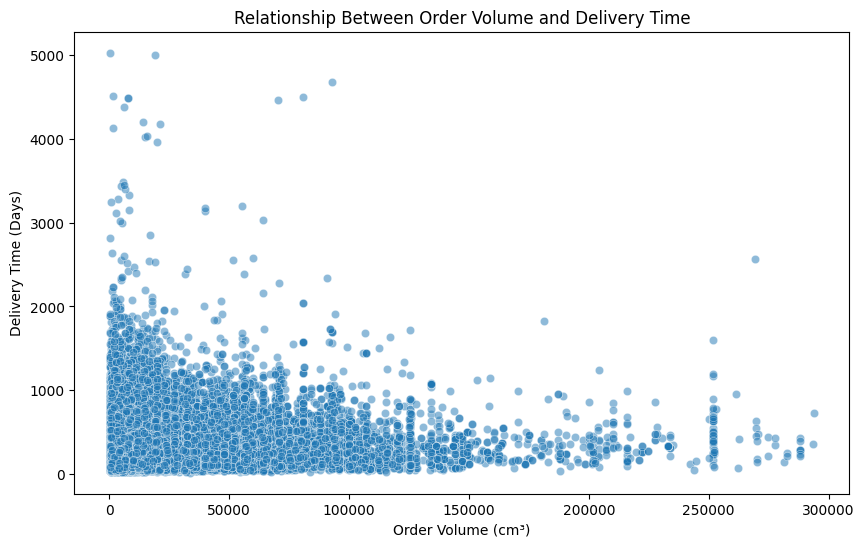

In [254]:
volume_to_delivery_time = orders.merge(orders_volume, on='order_id')[['delivery_time', 'volume']]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=volume_to_delivery_time, x='volume', y='delivery_time', alpha=0.5)
plt.xlabel("Order Volume (cm³)")
plt.ylabel("Delivery Time (Days)")
plt.title("Relationship Between Order Volume and Delivery Time")
plt.show()

In [255]:
orderItems

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66
...,...,...,...,...,...
89311,zlcLnXGgAabl,W8vikEizUggJ,2QjevWskirjm,31.99,188.65
89312,IlTAoIkILwrq,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64
89313,uA6oXfftGVmT,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09
89314,v3QtU6xlGDJp,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01


In [256]:
products = products.merge(orderItems[['product_id', 'price']].groupby('product_id').mean().reset_index(), on='product_id', how='left')
products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0,3648.0,245.855385
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0,4284.0,128.893333
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0,4096.0,64.400000
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0,9792.0,264.500000
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0,816.0,566.161538
...,...,...,...,...,...,...,...,...
27446,USSzekoHkA25,toys,1352.0,37.0,9.0,30.0,9990.0,419.800000
27447,SZRgDV7xa2U8,toys,1360.0,28.0,21.0,24.0,14112.0,216.900000
27448,w2OtdEjwNHBr,toys,833.0,17.0,12.0,16.0,3264.0,170.700000
27449,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0,4116.0,31.990000


In [257]:
products['price']=products['price'].apply(lambda x: round(x,2))
products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0,3648.0,245.86
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0,4284.0,128.89
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0,4096.0,64.40
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0,9792.0,264.50
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0,816.0,566.16
...,...,...,...,...,...,...,...,...
27446,USSzekoHkA25,toys,1352.0,37.0,9.0,30.0,9990.0,419.80
27447,SZRgDV7xa2U8,toys,1360.0,28.0,21.0,24.0,14112.0,216.90
27448,w2OtdEjwNHBr,toys,833.0,17.0,12.0,16.0,3264.0,170.70
27449,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0,4116.0,31.99


In [258]:
avg_price_per_category = products.groupby('product_category_name')['price'].mean().sort_values(ascending=False)
avg_price_per_category

,price
product_category_name,
la_cuisine,1660.436667
home_comfort_2,692.000000
furniture_bedroom,667.166667
agro_industry_and_commerce,542.068333
arts_and_craftmanship,504.360000
...,...
furniture_mattress_and_upholstery,76.990000
security_and_services,45.900000
fashio_female_clothing,34.070000


In [259]:
orderItems

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66
...,...,...,...,...,...
89311,zlcLnXGgAabl,W8vikEizUggJ,2QjevWskirjm,31.99,188.65
89312,IlTAoIkILwrq,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64
89313,uA6oXfftGVmT,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09
89314,v3QtU6xlGDJp,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01


In [260]:
orders_ordersItem = orders.merge(orderItems, on='order_id')
orders_prices = orders_ordersItem.groupby('order_id')['price'].sum().reset_index()
orders_shipping = orders_ordersItem.groupby('order_id')['shipping_charges'].sum().reset_index()
orders_prices

,order_id,price
0,001gkk6BwKEB,12.69
1,0029bAIZFMKA,692.00
2,002Jk8hp9Bhy,41.79
3,002ohHsWSKrP,459.00
4,0041NijdAYB0,518.18
...,...,...
89306,zznTUG01XP33,49.38
89307,zzp0E0UK1yAl,56.89
89308,zzq1nZ4dGR6g,914.00
89309,zzqZvKoIAsrw,2130.00


In [261]:
orders_shipping

,order_id,shipping_charges
0,001gkk6BwKEB,7.01
1,0029bAIZFMKA,163.52
2,002Jk8hp9Bhy,87.87
3,002ohHsWSKrP,21.91
4,0041NijdAYB0,32.11
...,...,...
89306,zznTUG01XP33,42.36
89307,zzp0E0UK1yAl,16.37
89308,zzq1nZ4dGR6g,32.03
89309,zzqZvKoIAsrw,19.38


In [262]:
orders_prices.rename(columns={'price':'total_price'}, inplace=True)
orders_shipping.rename(columns={'shipping_charges':'total_shipping'}, inplace=True)
orders = orders.merge(orders_prices, on='order_id', how='left')
orders = orders.merge(orders_shipping, on='order_id', how='left')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delivery_time,total_price,total_shipping
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,99.366111,223.51,84.65
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,313.180833,170.80,23.79
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,249.171944,64.40,17.38
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,217.989444,264.50,30.72
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,338.645833,779.90,30.66
...,...,...,...,...,...,...,...,...,...,...
89306,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,261.369444,31.99,188.65
89307,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,128.053611,282.00,1.64
89308,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,67.040556,58.10,4.09
89309,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,85.658056,2899.00,113.01


In [272]:
orders['aprove_time'] = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.total_seconds()/3600
orders['aprove_time'].describe()

,aprove_time
count,89302.000000
mean,10.431390
std,22.101315
min,0.000000
25%,0.215278
50%,0.344722
75%,14.872361
max,1450.866389


###Final Look

In [263]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP


In [264]:
orderItems.head()

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66


In [265]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0,3648.0,245.86
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0,4284.0,128.89
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0,4096.0,64.40
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0,9792.0,264.50
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0,816.0,566.16


In [273]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,delivery_time,total_price,total_shipping,aprove_time
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,99.366111,223.51,84.65,0.271944
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,313.180833,170.80,23.79,0.663611
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,249.171944,64.40,17.38,23.934444
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,217.989444,264.50,30.72,0.179722
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,338.645833,779.90,30.66,0.790833


In [269]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15


In [271]:
orders.to_csv('orders.csv', index=False)
products.to_csv('products.csv', index=False)
customers.to_csv('customers.csv', index=False)
orderItems.to_csv('orderItems.csv', index=False)
payments.to_csv('payments.csv', index=False)